In [1]:
lung_onda = 650e-09
L = 0.99

maxIntens
16.51558
maxIntens2
17.08885
maxIntens3
16.91312
maxIntens4
4.85733
b
8e-05
bfit
7.845810400703982e-05
0.02066305204665141
bfit2
8.054607073764951e-05
0.013783755778349876
bfit3
7.981569105167374e-05
0.011678679471365389
bfit4
8.423138411992729e-05
0.012049483308891376


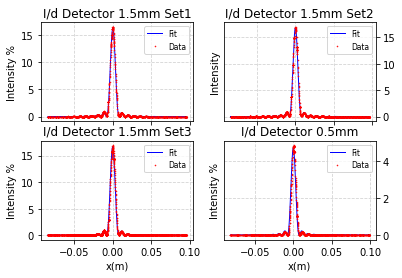

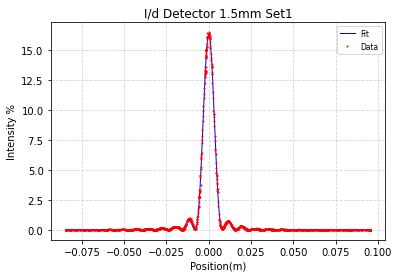

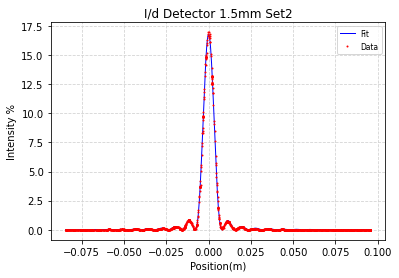

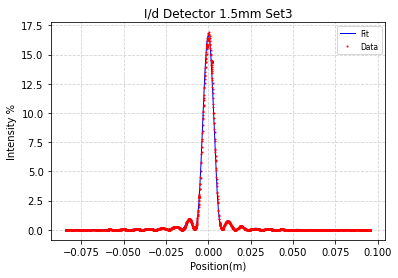

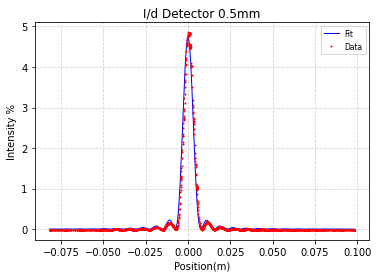

In [96]:
b = 0.08e-03

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize


Table = np.loadtxt("/content/drive/MyDrive/Github/OtticaGruppo8/sets/Antonio_0.08_1.5_lampadina.txt", delimiter="\t", skiprows=1, unpack = False)
Table = Table.transpose()

Table2 = np.loadtxt("/content/drive/MyDrive/Github/OtticaGruppo8/sets/Alessio_0.08_1.5_lampadina.txt", delimiter="\t", skiprows=1, unpack = False)
Table2 = Table2.transpose()

Table3 = np.loadtxt("/content/drive/MyDrive/Github/OtticaGruppo8/sets/Alessandra_0.08_1.5_lampadina.txt", delimiter="\t", skiprows=1, unpack = False)
Table3 = Table3.transpose()

Table4 = np.loadtxt("/content/drive/MyDrive/Github/OtticaGruppo8/sets/Antonio_0.08_0.5_lampadina.txt", delimiter="\t", skiprows=1, unpack = False)
Table4 = Table4.transpose()

Idata = Table[0]-0.04474
xdata = Table[1]

Idata2 = Table2[0]-0.04474
xdata2 = Table2[1]

Idata3 = Table3[0]-0.04474
xdata3 = Table3[1]

Idata4 = Table4[0]-0.04474
xdata4 = Table4[1]

maxint = np.argmax(Idata)
xdata = (xdata-xdata[maxint])

maxint = np.argmax(Idata2)
xdata2 = (xdata2-xdata2[maxint])

maxint = np.argmax(Idata3)
xdata3 = (xdata3-xdata3[maxint])

maxint = np.argmax(Idata4)
xdata4 = (xdata4-xdata4[maxint])



MaxIntensity = np.max(Idata)
print('maxIntens')
print(MaxIntensity)

MaxIntensity2 = np.max(Idata2)
print('maxIntens2')
print(MaxIntensity2)

MaxIntensity3 = np.max(Idata3)
print('maxIntens3')
print(MaxIntensity3)

MaxIntensity4 = np.max(Idata4)
print('maxIntens4')
print(MaxIntensity4)

xdataerr = 0.0000001*xdata
Idataerr = np.ones(len(xdata))*(0.01257+0.04585)

xdataerr2 = 0.0000001*xdata2
Idataerr2 = np.ones(len(xdata2))*(0.01257+0.04585)

xdataerr3 = 0.0000001*xdata3
Idataerr3 = np.ones(len(xdata3))*(0.01257+0.04585)

xdataerr4 = 0.0000001*xdata4
Idataerr4 = np.ones(len(xdata4))*(0.01257+0.04585)


def distanceFunctionFit(x,b,intensity):
  return (intensity*((np.sin(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))/(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))**2)
def distanceFunctionFit2(x,b,intensity):
  return (intensity*((np.sin(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))/(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))**2)
def distanceFunctionFit3(x,b,intensity):
  return (intensity*((np.sin(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))/(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))**2)
def distanceFunctionFit4(x,b,intensity):
  return (intensity*((np.sin(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))/(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))**2)

#simulation

#tolgo gli zeri

xdata1 = []
Idata1 = []
Idataerr1 = []
for i in range(len(Idata)):
  if(xdata[i] != 0):
    xdata1.append(xdata[i])
    Idata1.append(Idata[i])
    Idataerr1.append(Idataerr[i])

xdata12 = []
Idata12 = []
Idataerr12 = []
for i in range(len(Idata2)):
  if(xdata2[i] != 0):
    xdata12.append(xdata2[i])
    Idata12.append(Idata2[i])
    Idataerr12.append(Idataerr2[i])

xdata13 = []
Idata13 = []
Idataerr13 = []
for i in range(len(xdata3)):
  if(xdata3[i] != 0):
    xdata13.append(xdata3[i])
    Idata13.append(Idata3[i])
    Idataerr13.append(Idataerr3[i])

xdata14 = []
Idata14 = []
Idataerr14 = []
for i in range(len(xdata4)):
  if(xdata4[i] != 0):
    xdata14.append(xdata4[i])
    Idata14.append(Idata4[i])
    Idataerr14.append(Idataerr4[i])


x = np.linspace(min(xdata),max(xdata),1000)
y = distanceFunctionFit(x,b,MaxIntensity)

x2 = np.linspace(min(xdata2),max(xdata2),1000)
y2 = distanceFunctionFit2(x2,b,MaxIntensity2)

x3 = np.linspace(min(xdata3),max(xdata3),1000)
y3 = distanceFunctionFit3(x3,b,MaxIntensity3)

x4 = np.linspace(min(xdata4),max(xdata4),1000)
y4 = distanceFunctionFit4(x4,b,MaxIntensity4)


#fitting distance from measured intensity
print("b")
print(b)
#set1
guess = np.array([b,MaxIntensity])
popt, pcov = scipy.optimize.curve_fit(distanceFunctionFit, xdata1, Idata1,sigma = Idataerr1,p0 = guess)

intensityerr,bfiterr = np.sqrt(np.diag(pcov))
bfit,intensity = popt
print("bfit")
print(bfit)
print(bfiterr)

xfitb = np.linspace(min(xdata), max(xdata), 1000)
yfitb = distanceFunctionFit(xfitb,bfit,intensity)

#set2
guess = np.array([b,MaxIntensity2])
popt, pcov = scipy.optimize.curve_fit(distanceFunctionFit2, xdata12, Idata12,sigma = Idataerr12,p0 = guess)

intensityerr,bfiterr = np.sqrt(np.diag(pcov))
bfit,intensity = popt
print("bfit2")

print(bfit)
print(bfiterr)
xfitb2 = np.linspace(min(xdata), max(xdata), 1000)
yfitb2 = distanceFunctionFit2(xfitb2,bfit,intensity)

#set3
guess = np.array([b,MaxIntensity3])
popt, pcov = scipy.optimize.curve_fit(distanceFunctionFit3, xdata13, Idata13,sigma = Idataerr13,p0 = guess)

intensityerr,bfiterr = np.sqrt(np.diag(pcov))
bfit,intensity = popt
print("bfit3")

print(bfit)
print(bfiterr)
xfitb3 = np.linspace(min(xdata3), max(xdata3), 1000)
yfitb3 = distanceFunctionFit3(xfitb3,bfit,intensity)

#set4
guess = np.array([b,MaxIntensity4])
popt, pcov = scipy.optimize.curve_fit(distanceFunctionFit4, xdata14, Idata14,sigma = Idataerr14,p0 = guess)

intensityerr,bfiterr = np.sqrt(np.diag(pcov))
bfit,intensity = popt
print("bfit4")

print(bfit)
print(bfiterr)
xfitb4 = np.linspace(min(xdata4), max(xdata4), 1000)
yfitb4 = distanceFunctionFit4(xfitb4,bfit,intensity)


#graph


fig, axs = plt.subplots(2, 2)
axs[0, 0].grid(color='lightgray',linestyle="--",zorder=0)
axs[0, 0].plot(xfitb, yfitb, linewidth=1, zorder=3, color="blue", label='Fit')
#axs[0, 0].plot(x,y, label="Simulation", color="orange", linewidth=3, zorder=1)
axs[0, 0].errorbar(xdata1,Idata1,label="Data", color = "red", fmt='o', markersize=0.55, zorder=4)
axs[0, 0].set_title('I/d Detector 1.5mm Set1')
axs[0, 0].legend(loc="upper right",prop={'size': 7.5})
axs[0, 1].grid(color='lightgray',linestyle="--",zorder=0)
axs[0, 1].plot(xfitb2, yfitb2, linewidth=1, zorder=3, color="blue", label='Fit')
#axs[0, 1].plot(x2,y2, label="Simulation", color="orange", linewidth=3, zorder=1)
axs[0, 1].errorbar(xdata12,Idata12,label="Data", color = "red", fmt='o', markersize=0.55, zorder=4)
axs[0, 1].set_title('I/d Detector 1.5mm Set2')
axs[0, 1].legend(loc="upper right",prop={'size': 7.5})

axs[1, 0].grid(color='lightgray',linestyle="--",zorder=0)
axs[1, 0].plot(xfitb3, yfitb3, linewidth=1, zorder=3, color="blue", label='Fit')
#axs[1, 0].plot(x3,y3, label="Simulation", color="orange", linewidth=3, zorder=1)
axs[1, 0].errorbar(xdata13,Idata13,label="Data", color = "red", fmt='o', markersize=0.55, zorder=4)
axs[1, 0].set_title('I/d Detector 1.5mm Set3')
axs[1, 0].legend(loc="upper right",prop={'size': 7.5})
axs[1, 1].grid(color='lightgray',linestyle="--",zorder=0)
axs[1, 1].plot(xfitb4, yfitb4, linewidth=1, zorder=3, color="blue", label='Fit')
#axs[1, 1].plot(x4,y4, label="Simulation", color="orange", linewidth=3, zorder=1)
axs[1, 1].errorbar(xdata14,Idata14,label="Data", color = "red", fmt='o', markersize=0.55, zorder=4)
axs[1, 1].set_title('I/d Detector 0.5mm')
axs[1, 1].legend(loc="upper right",prop={'size': 7.5})
axs[1, 1].yaxis.tick_right()

for ax in axs.flat:
    ax.set(xlabel='x(m)', ylabel='Intensity %')
axs[0, 0].label_outer()
axs[0, 1].label_outer()
axs[0, 1].yaxis.tick_right()
axs[0, 1].set(ylabel='Intensity')
plt.show()
fig.savefig(f'4Grafici_0.08.pdf',dpi = 300)

fig = plt.figure()
ax = fig.gca()
plt.grid(color='lightgray',linestyle="--",zorder=0)
plt.plot(xfitb, yfitb, linewidth=1, zorder=3, color="blue", label='Fit')
#plt.plot(x,y, label="Simulation", color="orange", linewidth=3, zorder=1)
plt.errorbar(xdata1,Idata1,label="Data", color = "red", fmt='o', markersize=1, zorder=4)
plt.xlabel('Position(m)')
plt.ylabel('Intensity %')
ax.set_title('I/d Detector 1.5mm Set1')
plt.legend(loc="upper right",prop={'size': 7.5})

plt.show()
fig.savefig(f'Grafico_0.08_1.5_set1.pdf',dpi = 300)

fig = plt.figure()
ax = fig.gca()
plt.grid(color='lightgray',linestyle="--",zorder=0)
plt.plot(xfitb2, yfitb2, linewidth=1, zorder=3, color="blue", label='Fit')
#plt.plot(x2,y2, label="Simulation", color="orange", linewidth=3, zorder=1)
plt.errorbar(xdata12,Idata12,label="Data", color = "red", fmt='o', markersize=1, zorder=4)
plt.xlabel('Position(m)')
plt.ylabel('Intensity %')
ax.set_title('I/d Detector 1.5mm Set2')
plt.legend(loc="upper right",prop={'size': 7.5})

plt.show()
fig.savefig(f'Grafico_0.08_1.5_set2.pdf',dpi = 300)

fig = plt.figure()
ax = fig.gca()
plt.grid(color='lightgray',linestyle="--",zorder=0)
plt.plot(xfitb3, yfitb3, linewidth=1, zorder=3, color="blue", label='Fit')
#plt.plot(x3,y3, label="Simulation", color="orange", linewidth=3, zorder=1)
plt.errorbar(xdata13,Idata13,label="Data", color = "red", fmt='o', markersize=1, zorder=4)
plt.xlabel('Position(m)')
plt.ylabel('Intensity %')
ax.set_title('I/d Detector 1.5mm Set3')
plt.legend(loc="upper right",prop={'size': 7.5})

plt.show()
fig.savefig(f'Grafico_0.08_1.5_set3.pdf',dpi = 300)


fig = plt.figure()
ax = fig.gca()
plt.grid(color='lightgray',linestyle="--",zorder=0)
plt.plot(xfitb4, yfitb4, linewidth=1, zorder=3, color="blue", label='Fit')
#plt.plot(x4,y4, label="Simulation", color="orange", linewidth=3, zorder=1)
plt.errorbar(xdata14,Idata14,label="Data", color = "red", fmt='o', markersize=1, zorder=4)
plt.xlabel('Position(m)')
plt.ylabel('Intensity %')
ax.set_title('I/d Detector 0.5mm')
plt.legend(loc="upper right",prop={'size': 7.5})

plt.show()
fig.savefig(f'Grafico_0.08_0.5.pdf',dpi = 300)

maxIntens
4.26646
maxIntens2
4.3692
maxIntens3
4.4225
maxIntens4
2.08494
b
4e-05
bfit
4.141653827482567e-05
0.006556450641647967
bfit2
4.4393584718688724e-05
0.010921782910736805
bfit3
4.376912867869159e-05
0.005103039502578528
bfit4
3.954674357580612e-05
0.0039055058628080994


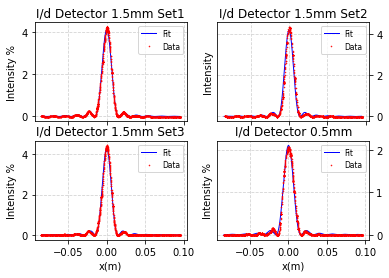

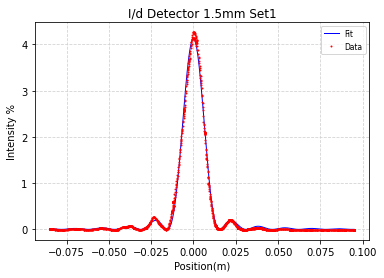

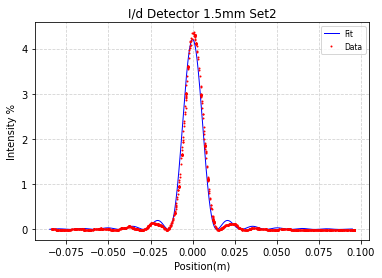

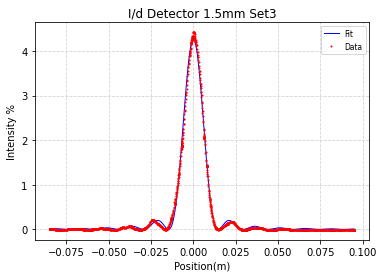

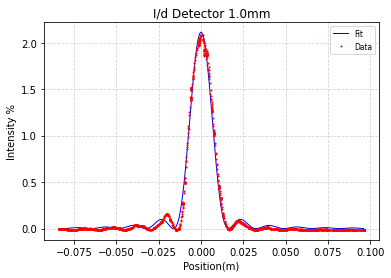

In [97]:
b = 0.04e-03

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize


Table = np.loadtxt("/content/drive/MyDrive/Github/OtticaGruppo8/sets/Antonio_0.04_1.5_lampadina.txt", delimiter="\t", skiprows=1, unpack = False)
Table = Table.transpose()

Table2 = np.loadtxt("/content/drive/MyDrive/Github/OtticaGruppo8/sets/Alessio_0.04_1.5_lampadina.txt", delimiter="\t", skiprows=1, unpack = False)
Table2 = Table2.transpose()

Table3 = np.loadtxt("/content/drive/MyDrive/Github/OtticaGruppo8/sets/Alessandra_0.04_1.5_lampadina.txt", delimiter="\t", skiprows=1, unpack = False)
Table3 = Table3.transpose()

Table4 = np.loadtxt("/content/drive/MyDrive/Github/OtticaGruppo8/sets/Alessio_0.04_1.0_lampada.txt", delimiter="\t", skiprows=1, unpack = False)
Table4 = Table4.transpose()

Idata = Table[0]-0.04474
xdata = Table[1]

Idata2 = Table2[0]-0.04474
xdata2 = Table2[1]

Idata3 = Table3[0]-0.04474
xdata3 = Table3[1]

Idata4 = Table4[0]-0.04474
xdata4 = Table4[1]

maxint = np.argmax(Idata)
xdata = (xdata-xdata[maxint])

maxint = np.argmax(Idata2)
xdata2 = (xdata2-xdata2[maxint])

maxint = np.argmax(Idata3)
xdata3 = (xdata3-xdata3[maxint])

maxint = np.argmax(Idata4)
xdata4 = (xdata4-xdata4[maxint])



MaxIntensity = np.max(Idata)
print('maxIntens')
print(MaxIntensity)

MaxIntensity2 = np.max(Idata2)
print('maxIntens2')
print(MaxIntensity2)

MaxIntensity3 = np.max(Idata3)
print('maxIntens3')
print(MaxIntensity3)

MaxIntensity4 = np.max(Idata4)
print('maxIntens4')
print(MaxIntensity4)

xdataerr = 0.0000001*xdata
Idataerr = np.ones(len(xdata))*(0.01257+0.04585)

xdataerr2 = 0.0000001*xdata2
Idataerr2 = np.ones(len(xdata2))*(0.01257+0.04585)

xdataerr3 = 0.0000001*xdata3
Idataerr3 = np.ones(len(xdata3))*(0.01257+0.04585)

xdataerr4 = 0.0000001*xdata4
Idataerr4 = np.ones(len(xdata4))*(0.01257+0.04585)


def distanceFunctionFit(x,b,intensity):
  return (intensity*((np.sin(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))/(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))**2)
def distanceFunctionFit2(x,b,intensity):
  return (intensity*((np.sin(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))/(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))**2)
def distanceFunctionFit3(x,b,intensity):
  return (intensity*((np.sin(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))/(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))**2)
def distanceFunctionFit4(x,b,intensity):
  return (intensity*((np.sin(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))/(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))**2)

#simulation

#tolgo gli zeri

xdata1 = []
Idata1 = []
Idataerr1 = []
for i in range(len(Idata)):
  if(xdata[i] != 0):
    xdata1.append(xdata[i])
    Idata1.append(Idata[i])
    Idataerr1.append(Idataerr[i])

xdata12 = []
Idata12 = []
Idataerr12 = []
for i in range(len(Idata2)):
  if(xdata2[i] != 0):
    xdata12.append(xdata2[i])
    Idata12.append(Idata2[i])
    Idataerr12.append(Idataerr2[i])

xdata13 = []
Idata13 = []
Idataerr13 = []
for i in range(len(xdata3)):
  if(xdata3[i] != 0):
    xdata13.append(xdata3[i])
    Idata13.append(Idata3[i])
    Idataerr13.append(Idataerr3[i])

xdata14 = []
Idata14 = []
Idataerr14 = []
for i in range(len(xdata4)):
  if(xdata4[i] != 0):
    xdata14.append(xdata4[i])
    Idata14.append(Idata4[i])
    Idataerr14.append(Idataerr4[i])


x = np.linspace(min(xdata),max(xdata),1000)
y = distanceFunctionFit(x,b,MaxIntensity)

x2 = np.linspace(min(xdata2),max(xdata2),1000)
y2 = distanceFunctionFit2(x2,b,MaxIntensity2)

x3 = np.linspace(min(xdata3),max(xdata3),1000)
y3 = distanceFunctionFit3(x3,b,MaxIntensity3)

x4 = np.linspace(min(xdata4),max(xdata4),1000)
y4 = distanceFunctionFit4(x4,b,MaxIntensity4)


#fitting distance from measured intensity
print("b")
print(b)
#set1
guess = np.array([b,MaxIntensity])
popt, pcov = scipy.optimize.curve_fit(distanceFunctionFit, xdata1, Idata1,sigma = Idataerr1,p0 = guess)

intensityerr,bfiterr = np.sqrt(np.diag(pcov))
bfit,intensity = popt
print("bfit")
print(bfit)
print(bfiterr)

xfitb = np.linspace(min(xdata), max(xdata), 1000)
yfitb = distanceFunctionFit(xfitb,bfit,intensity)

#set2
guess = np.array([b,MaxIntensity2])
popt, pcov = scipy.optimize.curve_fit(distanceFunctionFit2, xdata12, Idata12,sigma = Idataerr12,p0 = guess)

intensityerr,bfiterr = np.sqrt(np.diag(pcov))
bfit,intensity = popt
print("bfit2")

print(bfit)
print(bfiterr)
xfitb2 = np.linspace(min(xdata), max(xdata), 1000)
yfitb2 = distanceFunctionFit2(xfitb2,bfit,intensity)

#set3
guess = np.array([b,MaxIntensity3])
popt, pcov = scipy.optimize.curve_fit(distanceFunctionFit3, xdata13, Idata13,sigma = Idataerr13,p0 = guess)

intensityerr,bfiterr = np.sqrt(np.diag(pcov))
bfit,intensity = popt
print("bfit3")

print(bfit)
print(bfiterr)
xfitb3 = np.linspace(min(xdata3), max(xdata3), 1000)
yfitb3 = distanceFunctionFit3(xfitb3,bfit,intensity)

#set4
guess = np.array([b,MaxIntensity4])
popt, pcov = scipy.optimize.curve_fit(distanceFunctionFit4, xdata14, Idata14,sigma = Idataerr14,p0 = guess)

intensityerr,bfiterr = np.sqrt(np.diag(pcov))
bfit,intensity = popt
print("bfit4")

print(bfit)
print(bfiterr)
xfitb4 = np.linspace(min(xdata4), max(xdata4), 1000)
yfitb4 = distanceFunctionFit4(xfitb4,bfit,intensity)


#graph


fig, axs = plt.subplots(2, 2)
axs[0, 0].grid(color='lightgray',linestyle="--",zorder=0)
axs[0, 0].plot(xfitb, yfitb, linewidth=1, zorder=3, color="blue", label='Fit')
#axs[0, 0].plot(x,y, label="Simulation", color="orange", linewidth=3, zorder=1)
axs[0, 0].errorbar(xdata1,Idata1,label="Data", color = "red", fmt='o', markersize=0.55, zorder=4)
axs[0, 0].set_title('I/d Detector 1.5mm Set1')
axs[0, 0].legend(loc="upper right",prop={'size': 7.5})
axs[0, 1].grid(color='lightgray',linestyle="--",zorder=0)
axs[0, 1].plot(xfitb2, yfitb2, linewidth=1, zorder=3, color="blue", label='Fit')
#axs[0, 1].plot(x2,y2, label="Simulation", color="orange", linewidth=3, zorder=1)
axs[0, 1].errorbar(xdata12,Idata12,label="Data", color = "red", fmt='o', markersize=0.55, zorder=4)
axs[0, 1].set_title('I/d Detector 1.5mm Set2')
axs[0, 1].legend(loc="upper right",prop={'size': 7.5})

axs[1, 0].grid(color='lightgray',linestyle="--",zorder=0)
axs[1, 0].plot(xfitb3, yfitb3, linewidth=1, zorder=3, color="blue", label='Fit')
#axs[1, 0].plot(x3,y3, label="Simulation", color="orange", linewidth=3, zorder=1)
axs[1, 0].errorbar(xdata13,Idata13,label="Data", color = "red", fmt='o', markersize=0.55, zorder=4)
axs[1, 0].set_title('I/d Detector 1.5mm Set3')
axs[1, 0].legend(loc="upper right",prop={'size': 7.5})
axs[1, 1].grid(color='lightgray',linestyle="--",zorder=0)
axs[1, 1].plot(xfitb4, yfitb4, linewidth=1, zorder=3, color="blue", label='Fit')
#axs[1, 1].plot(x4,y4, label="Simulation", color="orange", linewidth=3, zorder=1)
axs[1, 1].errorbar(xdata14,Idata14,label="Data", color = "red", fmt='o', markersize=0.55, zorder=4)
axs[1, 1].set_title('I/d Detector 0.5mm')
axs[1, 1].legend(loc="upper right",prop={'size': 7.5})
axs[1, 1].yaxis.tick_right()

for ax in axs.flat:
    ax.set(xlabel='x(m)', ylabel='Intensity %')
axs[0, 0].label_outer()
axs[0, 1].label_outer()
axs[0, 1].yaxis.tick_right()
axs[0, 1].set(ylabel='Intensity')
plt.show()
fig.savefig(f'4Grafici_0.04.pdf',dpi = 300)

fig = plt.figure()
ax = fig.gca()
plt.grid(color='lightgray',linestyle="--",zorder=0)
plt.plot(xfitb, yfitb, linewidth=1, zorder=3, color="blue", label='Fit')
#plt.plot(x,y, label="Simulation", color="orange", linewidth=3, zorder=1)
plt.errorbar(xdata1,Idata1,label="Data", color = "red", fmt='o', markersize=1, zorder=4)
plt.xlabel('Position(m)')
plt.ylabel('Intensity %')
ax.set_title('I/d Detector 1.5mm Set1')
plt.legend(loc="upper right",prop={'size': 7.5})

plt.show()
fig.savefig(f'Grafico_0.04_1.5_set1.pdf',dpi = 300)

fig = plt.figure()
ax = fig.gca()
plt.grid(color='lightgray',linestyle="--",zorder=0)
plt.plot(xfitb2, yfitb2, linewidth=1, zorder=3, color="blue", label='Fit')
#plt.plot(x2,y2, label="Simulation", color="orange", linewidth=3, zorder=1)
plt.errorbar(xdata12,Idata12,label="Data", color = "red", fmt='o', markersize=1, zorder=4)
plt.xlabel('Position(m)')
plt.ylabel('Intensity %')
ax.set_title('I/d Detector 1.5mm Set2')
plt.legend(loc="upper right",prop={'size': 7.5})

plt.show()
fig.savefig(f'Grafico_0.04_1.5_set2.pdf',dpi = 300)

fig = plt.figure()
ax = fig.gca()
plt.grid(color='lightgray',linestyle="--",zorder=0)
plt.plot(xfitb3, yfitb3, linewidth=1, zorder=3, color="blue", label='Fit')
#plt.plot(x3,y3, label="Simulation", color="orange", linewidth=3, zorder=1)
plt.errorbar(xdata13,Idata13,label="Data", color = "red", fmt='o', markersize=1, zorder=4)
plt.xlabel('Position(m)')
plt.ylabel('Intensity %')
ax.set_title('I/d Detector 1.5mm Set3')
plt.legend(loc="upper right",prop={'size': 7.5})

plt.show()
fig.savefig(f'Grafico_0.04_1.5_set3.pdf',dpi = 300)


fig = plt.figure()
ax = fig.gca()
plt.grid(color='lightgray',linestyle="--",zorder=0)
plt.plot(xfitb4, yfitb4, linewidth=1, zorder=3, color="blue", label='Fit')
#plt.plot(x4,y4, label="Simulation", color="orange", linewidth=3, zorder=1)
plt.errorbar(xdata14,Idata14,label="Data", color = "red", fmt='o', markersize=1, zorder=4)
plt.xlabel('Position(m)')
plt.ylabel('Intensity %')
ax.set_title('I/d Detector 1.0mm')
plt.legend(loc="upper right",prop={'size': 7.5})

plt.show()
fig.savefig(f'Grafico_0.04_1.0.pdf',dpi = 300)

maxIntens
1.09645
maxIntens2
1.30102
maxIntens3
1.21071
maxIntens4
64.81709
b
2e-05
bfit
1.887482692008058e-05
0.003178811436452156
bfit2
2.0912019943216853e-05
0.0037738238553852587
bfit3
2.144424565845737e-05
0.0036827526181611647
bfit4
1.9676289733139484e-05
0.35769933320542


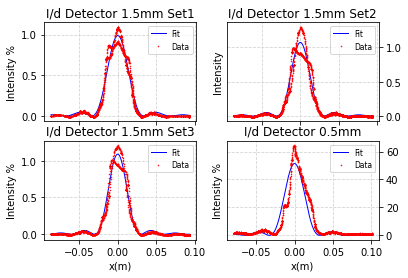

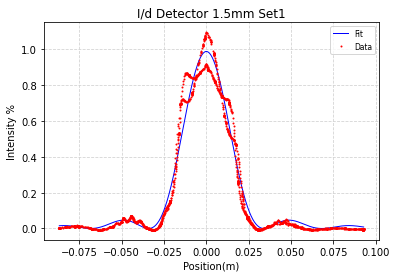

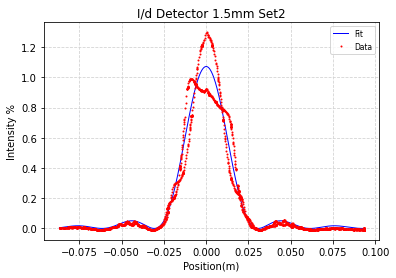

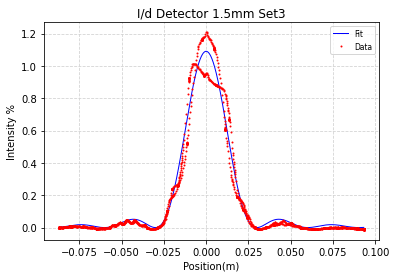

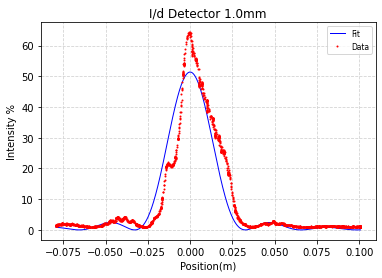

In [99]:
b = 0.02e-03

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize


Table = np.loadtxt("/content/drive/MyDrive/Github/OtticaGruppo8/sets/Antonio_0.02_1.5_lampadina_2.txt", delimiter="\t", skiprows=1, unpack = False)
Table = Table.transpose()

Table2 = np.loadtxt("/content/drive/MyDrive/Github/OtticaGruppo8/sets/Alessio_0.02_1.5_lampadina.txt", delimiter="\t", skiprows=1, unpack = False)
Table2 = Table2.transpose()

Table3 = np.loadtxt("/content/drive/MyDrive/Github/OtticaGruppo8/sets/Alessandra_0.02_1.5_lampadina.txt", delimiter="\t", skiprows=1, unpack = False)
Table3 = Table3.transpose()

Table4 = np.loadtxt("/content/drive/MyDrive/Github/OtticaGruppo8/sets/Alessio_0.02_1.0_candela.txt", delimiter="\t", skiprows=1, unpack = False)
Table4 = Table4.transpose()

Idata = Table[0]-0.04474
xdata = Table[1]

Idata2 = Table2[0]-0.04474
xdata2 = Table2[1]

Idata3 = Table3[0]-0.04474
xdata3 = Table3[1]

Idata4 = Table4[0]-0.04474
xdata4 = Table4[1]

maxint = np.argmax(Idata)
xdata = (xdata-xdata[maxint])

maxint = np.argmax(Idata2)
xdata2 = (xdata2-xdata2[maxint])

maxint = np.argmax(Idata3)
xdata3 = (xdata3-xdata3[maxint])

maxint = np.argmax(Idata4)
xdata4 = (xdata4-xdata4[maxint])



MaxIntensity = np.max(Idata)
print('maxIntens')
print(MaxIntensity)

MaxIntensity2 = np.max(Idata2)
print('maxIntens2')
print(MaxIntensity2)

MaxIntensity3 = np.max(Idata3)
print('maxIntens3')
print(MaxIntensity3)

MaxIntensity4 = np.max(Idata4)
print('maxIntens4')
print(MaxIntensity4)

xdataerr = 0.0000001*xdata
Idataerr = np.ones(len(xdata))*(0.01257+0.04585)

xdataerr2 = 0.0000001*xdata2
Idataerr2 = np.ones(len(xdata2))*(0.01257+0.04585)

xdataerr3 = 0.0000001*xdata3
Idataerr3 = np.ones(len(xdata3))*(0.01257+0.04585)

xdataerr4 = 0.0000001*xdata4
Idataerr4 = np.ones(len(xdata4))*(0.01257+0.04585)


def distanceFunctionFit(x,b,intensity):
  return (intensity*((np.sin(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))/(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))**2)
def distanceFunctionFit2(x,b,intensity):
  return (intensity*((np.sin(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))/(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))**2)
def distanceFunctionFit3(x,b,intensity):
  return (intensity*((np.sin(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))/(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))**2)
def distanceFunctionFit4(x,b,intensity):
  return (intensity*((np.sin(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))/(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))**2)

#simulation

#tolgo gli zeri

xdata1 = []
Idata1 = []
Idataerr1 = []
for i in range(len(Idata)):
  if(xdata[i] != 0):
    xdata1.append(xdata[i])
    Idata1.append(Idata[i])
    Idataerr1.append(Idataerr[i])

xdata12 = []
Idata12 = []
Idataerr12 = []
for i in range(len(Idata2)):
  if(xdata2[i] != 0):
    xdata12.append(xdata2[i])
    Idata12.append(Idata2[i])
    Idataerr12.append(Idataerr2[i])

xdata13 = []
Idata13 = []
Idataerr13 = []
for i in range(len(xdata3)):
  if(xdata3[i] != 0):
    xdata13.append(xdata3[i])
    Idata13.append(Idata3[i])
    Idataerr13.append(Idataerr3[i])

xdata14 = []
Idata14 = []
Idataerr14 = []
for i in range(len(xdata4)):
  if(xdata4[i] != 0):
    xdata14.append(xdata4[i])
    Idata14.append(Idata4[i])
    Idataerr14.append(Idataerr4[i])


x = np.linspace(min(xdata),max(xdata),1000)
y = distanceFunctionFit(x,b,MaxIntensity)

x2 = np.linspace(min(xdata2),max(xdata2),1000)
y2 = distanceFunctionFit2(x2,b,MaxIntensity2)

x3 = np.linspace(min(xdata3),max(xdata3),1000)
y3 = distanceFunctionFit3(x3,b,MaxIntensity3)

x4 = np.linspace(min(xdata4),max(xdata4),1000)
y4 = distanceFunctionFit4(x4,b,MaxIntensity4)


#fitting distance from measured intensity
print("b")
print(b)
#set1
guess = np.array([b,MaxIntensity])
popt, pcov = scipy.optimize.curve_fit(distanceFunctionFit, xdata1, Idata1,sigma = Idataerr1,p0 = guess)

intensityerr,bfiterr = np.sqrt(np.diag(pcov))
bfit,intensity = popt
print("bfit")
print(bfit)
print(bfiterr)

xfitb = np.linspace(min(xdata), max(xdata), 1000)
yfitb = distanceFunctionFit(xfitb,bfit,intensity)

#set2
guess = np.array([b,MaxIntensity2])
popt, pcov = scipy.optimize.curve_fit(distanceFunctionFit2, xdata12, Idata12,sigma = Idataerr12,p0 = guess)

intensityerr,bfiterr = np.sqrt(np.diag(pcov))
bfit,intensity = popt
print("bfit2")

print(bfit)
print(bfiterr)
xfitb2 = np.linspace(min(xdata), max(xdata), 1000)
yfitb2 = distanceFunctionFit2(xfitb2,bfit,intensity)

#set3
guess = np.array([b,MaxIntensity3])
popt, pcov = scipy.optimize.curve_fit(distanceFunctionFit3, xdata13, Idata13,sigma = Idataerr13,p0 = guess)

intensityerr,bfiterr = np.sqrt(np.diag(pcov))
bfit,intensity = popt
print("bfit3")

print(bfit)
print(bfiterr)
xfitb3 = np.linspace(min(xdata3), max(xdata3), 1000)
yfitb3 = distanceFunctionFit3(xfitb3,bfit,intensity)

#set4
guess = np.array([b,MaxIntensity4])
popt, pcov = scipy.optimize.curve_fit(distanceFunctionFit4, xdata14, Idata14,sigma = Idataerr14,p0 = guess)

intensityerr,bfiterr = np.sqrt(np.diag(pcov))
bfit,intensity = popt
print("bfit4")

print(bfit)
print(bfiterr)
xfitb4 = np.linspace(min(xdata4), max(xdata4), 1000)
yfitb4 = distanceFunctionFit4(xfitb4,bfit,intensity)


#graph


fig, axs = plt.subplots(2, 2)
axs[0, 0].grid(color='lightgray',linestyle="--",zorder=0)
axs[0, 0].plot(xfitb, yfitb, linewidth=1, zorder=3, color="blue", label='Fit')
#axs[0, 0].plot(x,y, label="Simulation", color="orange", linewidth=3, zorder=1)
axs[0, 0].errorbar(xdata1,Idata1,label="Data", color = "red", fmt='o', markersize=0.55, zorder=4)
axs[0, 0].set_title('I/d Detector 1.5mm Set1')
axs[0, 0].legend(loc="upper right",prop={'size': 7.5})
axs[0, 1].grid(color='lightgray',linestyle="--",zorder=0)
axs[0, 1].plot(xfitb2, yfitb2, linewidth=1, zorder=3, color="blue", label='Fit')
#axs[0, 1].plot(x2,y2, label="Simulation", color="orange", linewidth=3, zorder=1)
axs[0, 1].errorbar(xdata12,Idata12,label="Data", color = "red", fmt='o', markersize=0.55, zorder=4)
axs[0, 1].set_title('I/d Detector 1.5mm Set2')
axs[0, 1].legend(loc="upper right",prop={'size': 7.5})

axs[1, 0].grid(color='lightgray',linestyle="--",zorder=0)
axs[1, 0].plot(xfitb3, yfitb3, linewidth=1, zorder=3, color="blue", label='Fit')
#axs[1, 0].plot(x3,y3, label="Simulation", color="orange", linewidth=3, zorder=1)
axs[1, 0].errorbar(xdata13,Idata13,label="Data", color = "red", fmt='o', markersize=0.55, zorder=4)
axs[1, 0].set_title('I/d Detector 1.5mm Set3')
axs[1, 0].legend(loc="upper right",prop={'size': 7.5})
axs[1, 1].grid(color='lightgray',linestyle="--",zorder=0)
axs[1, 1].plot(xfitb4, yfitb4, linewidth=1, zorder=3, color="blue", label='Fit')
#axs[1, 1].plot(x4,y4, label="Simulation", color="orange", linewidth=3, zorder=1)
axs[1, 1].errorbar(xdata14,Idata14,label="Data", color = "red", fmt='o', markersize=0.55, zorder=4)
axs[1, 1].set_title('I/d Detector 0.5mm')
axs[1, 1].legend(loc="upper right",prop={'size': 7.5})
axs[1, 1].yaxis.tick_right()

for ax in axs.flat:
    ax.set(xlabel='x(m)', ylabel='Intensity %')
axs[0, 0].label_outer()
axs[0, 1].label_outer()
axs[0, 1].yaxis.tick_right()
axs[0, 1].set(ylabel='Intensity')
plt.show()
fig.savefig(f'4Grafici_0.02.pdf',dpi = 300)

fig = plt.figure()
ax = fig.gca()
plt.grid(color='lightgray',linestyle="--",zorder=0)
plt.plot(xfitb, yfitb, linewidth=1, zorder=3, color="blue", label='Fit')
#plt.plot(x,y, label="Simulation", color="orange", linewidth=3, zorder=1)
plt.errorbar(xdata1,Idata1,label="Data", color = "red", fmt='o', markersize=1, zorder=4)
plt.xlabel('Position(m)')
plt.ylabel('Intensity %')
ax.set_title('I/d Detector 1.5mm Set1')
plt.legend(loc="upper right",prop={'size': 7.5})

plt.show()
fig.savefig(f'Grafico_0.02_1.5_set1.pdf',dpi = 300)

fig = plt.figure()
ax = fig.gca()
plt.grid(color='lightgray',linestyle="--",zorder=0)
plt.plot(xfitb2, yfitb2, linewidth=1, zorder=3, color="blue", label='Fit')
#plt.plot(x2,y2, label="Simulation", color="orange", linewidth=3, zorder=1)
plt.errorbar(xdata12,Idata12,label="Data", color = "red", fmt='o', markersize=1, zorder=4)
plt.xlabel('Position(m)')
plt.ylabel('Intensity %')
ax.set_title('I/d Detector 1.5mm Set2')
plt.legend(loc="upper right",prop={'size': 7.5})

plt.show()
fig.savefig(f'Grafico_0.02_1.5_set2.pdf',dpi = 300)

fig = plt.figure()
ax = fig.gca()
plt.grid(color='lightgray',linestyle="--",zorder=0)
plt.plot(xfitb3, yfitb3, linewidth=1, zorder=3, color="blue", label='Fit')
#plt.plot(x3,y3, label="Simulation", color="orange", linewidth=3, zorder=1)
plt.errorbar(xdata13,Idata13,label="Data", color = "red", fmt='o', markersize=1, zorder=4)
plt.xlabel('Position(m)')
plt.ylabel('Intensity %')
ax.set_title('I/d Detector 1.5mm Set3')
plt.legend(loc="upper right",prop={'size': 7.5})

plt.show()
fig.savefig(f'Grafico_0.02_1.5_set3.pdf',dpi = 300)


fig = plt.figure()
ax = fig.gca()
plt.grid(color='lightgray',linestyle="--",zorder=0)
plt.plot(xfitb4, yfitb4, linewidth=1, zorder=3, color="blue", label='Fit')
#plt.plot(x4,y4, label="Simulation", color="orange", linewidth=3, zorder=1)
plt.errorbar(xdata14,Idata14,label="Data", color = "red", fmt='o', markersize=1, zorder=4)
plt.xlabel('Position(m)')
plt.ylabel('Intensity %')
ax.set_title('I/d Detector 1.0mm')
plt.legend(loc="upper right",prop={'size': 7.5})

plt.show()
fig.savefig(f'Grafico_0.02_1.0.pdf',dpi = 300)